## Feature engineering. 
This is the notebook for feature engineering. We start by looking at how the data looks now.

In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


In [50]:
# Define paths
processed_data_dir = Path('../data/processed')

# List all processed files
processed_files = list(processed_data_dir.glob('*_processed.csv'))
print(f"Found {len(processed_files)} processed data files:")
for file in processed_files:
    print(f"  - {file.name}")

# Load all data into a dictionary
data_dict = {}
for file_path in processed_files:
    data_type = file_path.stem.replace('_processed', '')
    print(f"\nLoading {data_type}...")
    
    try:
        df = pd.read_csv(file_path)
        # Convert datetime column
        df['datetime'] = pd.to_datetime(df['datetime'])
        data_dict[data_type] = df
        print(f"  ✓ Loaded {len(df)} records")
        print(f"  ✓ Date range: {df['datetime'].min()} to {df['datetime'].max()}")
        print(f"  ✓ Columns: {list(df.columns)}")
    except Exception as e:
        print(f"  ✗ Error loading {data_type}: {e}")

print(f"\nSuccessfully loaded {len(data_dict)} datasets")

Found 5 processed data files:
  - cross_current_processed.csv
  - water_height_processed.csv
  - wave_height_processed.csv
  - wind_direction_processed.csv
  - wind_speed_processed.csv

Loading cross_current...
  ✓ Loaded 26723 records
  ✓ Date range: 2025-01-01 00:00:00+00:00 to 2025-07-09 12:00:00+00:00
  ✓ Columns: ['datetime', 'datetime_unix', 'value', 'X', 'Y']

Loading water_height...
  ✓ Loaded 26531 records
  ✓ Date range: 2025-01-01 00:00:00+00:00 to 2025-07-09 12:00:00+00:00
  ✓ Columns: ['datetime', 'datetime_unix', 'value', 'X', 'Y']

Loading wave_height...
  ✓ Loaded 26592 records
  ✓ Date range: 2025-01-01 00:00:00+00:00 to 2025-07-09 12:00:00+00:00
  ✓ Columns: ['datetime', 'datetime_unix', 'value', 'X', 'Y']

Loading wind_direction...
  ✓ Loaded 27166 records
  ✓ Date range: 2025-01-01 00:00:00+00:00 to 2025-07-09 12:00:00+00:00
  ✓ Columns: ['datetime', 'datetime_unix', 'value', 'X', 'Y']

Loading wind_speed...
  ✓ Loaded 27166 records
  ✓ Date range: 2025-01-01 00:00:

In [51]:
# Display overview of each dataset
for data_type, df in data_dict.items():
    print(f"\n{'='*60}")
    print(f"DATASET: {data_type.upper()}")
    print(f"{'='*60}")
    
    print(f"Shape: {df.shape}")
    print(f"\nFirst few rows:")
    print(df.head())
    
    print(f"\nData types:")
    print(df.dtypes)
    
    print(f"\nBasic statistics for value:")
    print(df['value'].describe())
    
    print(f"\nMissing values:")
    print(df.isnull().sum())


DATASET: CROSS_CURRENT
Shape: (26723, 5)

First few rows:
                   datetime  datetime_unix     value       X         Y
0 2025-01-01 00:00:00+00:00      -1.739860  0.351148  4.5186  0.999981
1 2025-01-01 00:10:00+00:00      -1.739733  0.281155  4.5186  0.999981
2 2025-01-01 00:20:00+00:00      -1.739605  0.244408  4.5186  0.999981
3 2025-01-01 00:30:00+00:00      -1.739478  0.491133  4.5186  0.999981
4 2025-01-01 00:40:00+00:00      -1.739351  0.582124  4.5186  0.999981

Data types:
datetime         datetime64[ns, UTC]
datetime_unix                float64
value                        float64
X                            float64
Y                            float64
dtype: object

Basic statistics for value:
count    26723.000000
mean        -0.000019
std          1.000014
min         -1.785387
25%         -0.914850
50%         -0.147552
75%          0.897093
max          2.639917
Name: value, dtype: float64

Missing values:
datetime         0
datetime_unix    0
value          

In [52]:
# Analyze each dataset
for data_type, df in data_dict.items():
    print(f"\n{'='*50}")
    print(f"DATA QUALITY: {data_type.upper()}")
    print(f"{'='*50}")
    
    # Temporal coverage
    print(f"Temporal Coverage:")
    print(f"  Start: {df['datetime'].min()}")
    print(f"  End: {df['datetime'].max()}")
    print(f"  Duration: {df['datetime'].max() - df['datetime'].min()}")
    
    # Check for gaps in time series
    df_sorted = df.sort_values('datetime')
    time_diff = df_sorted['datetime'].diff()
    print(f"  Average time interval: {time_diff.mean()}")
    print(f"  Max time gap: {time_diff.max()}")
    
    # Value distribution
    print(f"\nValue Distribution:")
    print(f"  Min: {df['value'].min():.2f}")
    print(f"  Max: {df['value'].max():.2f}")
    print(f"  Mean: {df['value'].mean():.2f}")
    print(f"  Std: {df['value'].std():.2f}")
    
    # Check for outliers
    mean_val = df['value'].mean()
    std_val = df['value'].std()
    outliers = df[(df['value'] < mean_val - 3*std_val) | 
                   (df['value'] > mean_val + 3*std_val)]
    print(f"  Outliers (>3σ): {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    
    # Check for duplicate timestamps
    duplicates = df.duplicated(subset=['datetime']).sum()
    print(f"  Duplicate timestamps: {duplicates}")


DATA QUALITY: CROSS_CURRENT
Temporal Coverage:
  Start: 2025-01-01 00:00:00+00:00
  End: 2025-07-09 12:00:00+00:00
  Duration: 189 days 12:00:00
  Average time interval: 0 days 00:10:12.708629593
  Max time gap: 0 days 16:10:00

Value Distribution:
  Min: -1.79
  Max: 2.64
  Mean: -0.00
  Std: 1.00
  Outliers (>3σ): 0 (0.0%)
  Duplicate timestamps: 0

DATA QUALITY: WATER_HEIGHT
Temporal Coverage:
  Start: 2025-01-01 00:00:00+00:00
  End: 2025-07-09 12:00:00+00:00
  Duration: 189 days 12:00:00
  Average time interval: 0 days 00:10:17.142857142
  Max time gap: 0 days 05:00:00

Value Distribution:
  Min: -2.35
  Max: 2.97
  Mean: 0.00
  Std: 1.00
  Outliers (>3σ): 0 (0.0%)
  Duplicate timestamps: 0

DATA QUALITY: WAVE_HEIGHT
Temporal Coverage:
  Start: 2025-01-01 00:00:00+00:00
  End: 2025-07-09 12:00:00+00:00
  Duration: 189 days 12:00:00
  Average time interval: 0 days 00:10:15.727125719
  Max time gap: 1 days 03:50:00

Value Distribution:
  Min: -1.27
  Max: 6.97
  Mean: 0.00
  Std: 1

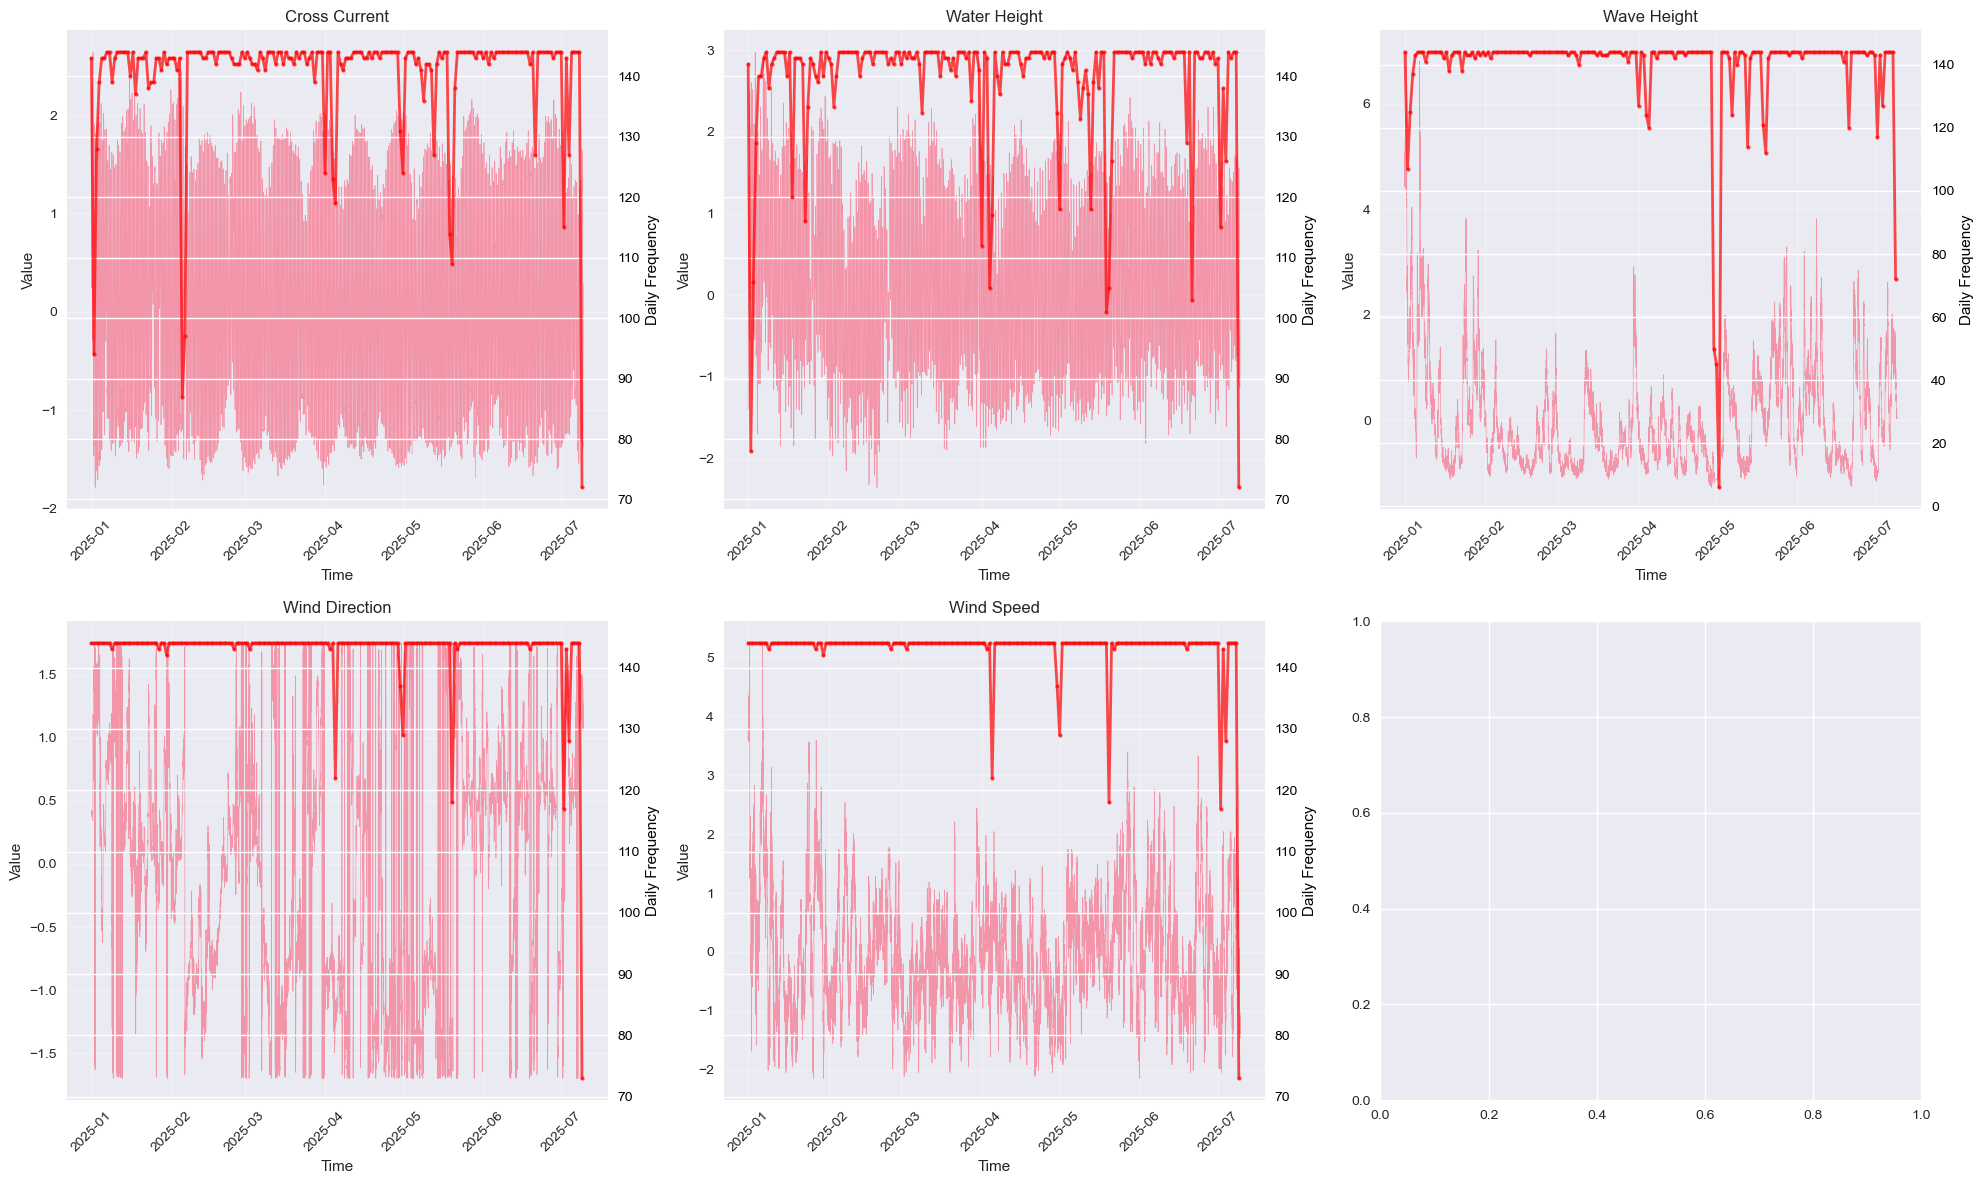

In [54]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, (data_type, df) in enumerate(data_dict.items()):
    if idx >= len(axes):
        break
    ax = axes[idx]
    
    # --- Numeric value over time ---
    ax.plot(df['datetime'], df['value'],
            alpha=0.7,      
            linewidth=0.5)  
    ax.set_title(data_type.replace("_", " ").title())
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    
    # --- Compute timestamp frequency ---
    # Convert to datetime if not already
    df_copy = df.copy()
    df_copy['datetime'] = pd.to_datetime(df_copy['datetime'])

    # Group by date (daily) and count
    daily_counts = df_copy.groupby(df_copy['datetime'].dt.date).size()

    # Plot daily frequency on secondary y-axis
    ax2 = ax.twinx()
    ax2.plot(daily_counts.index, daily_counts.values,
             color='red', alpha=0.7, linewidth=2, marker='o', markersize=3)    
    ax2.set_ylabel('Daily Frequency', color='black')
    ax2.tick_params(axis='y', labelcolor='black')


plt.tight_layout()
plt.show()

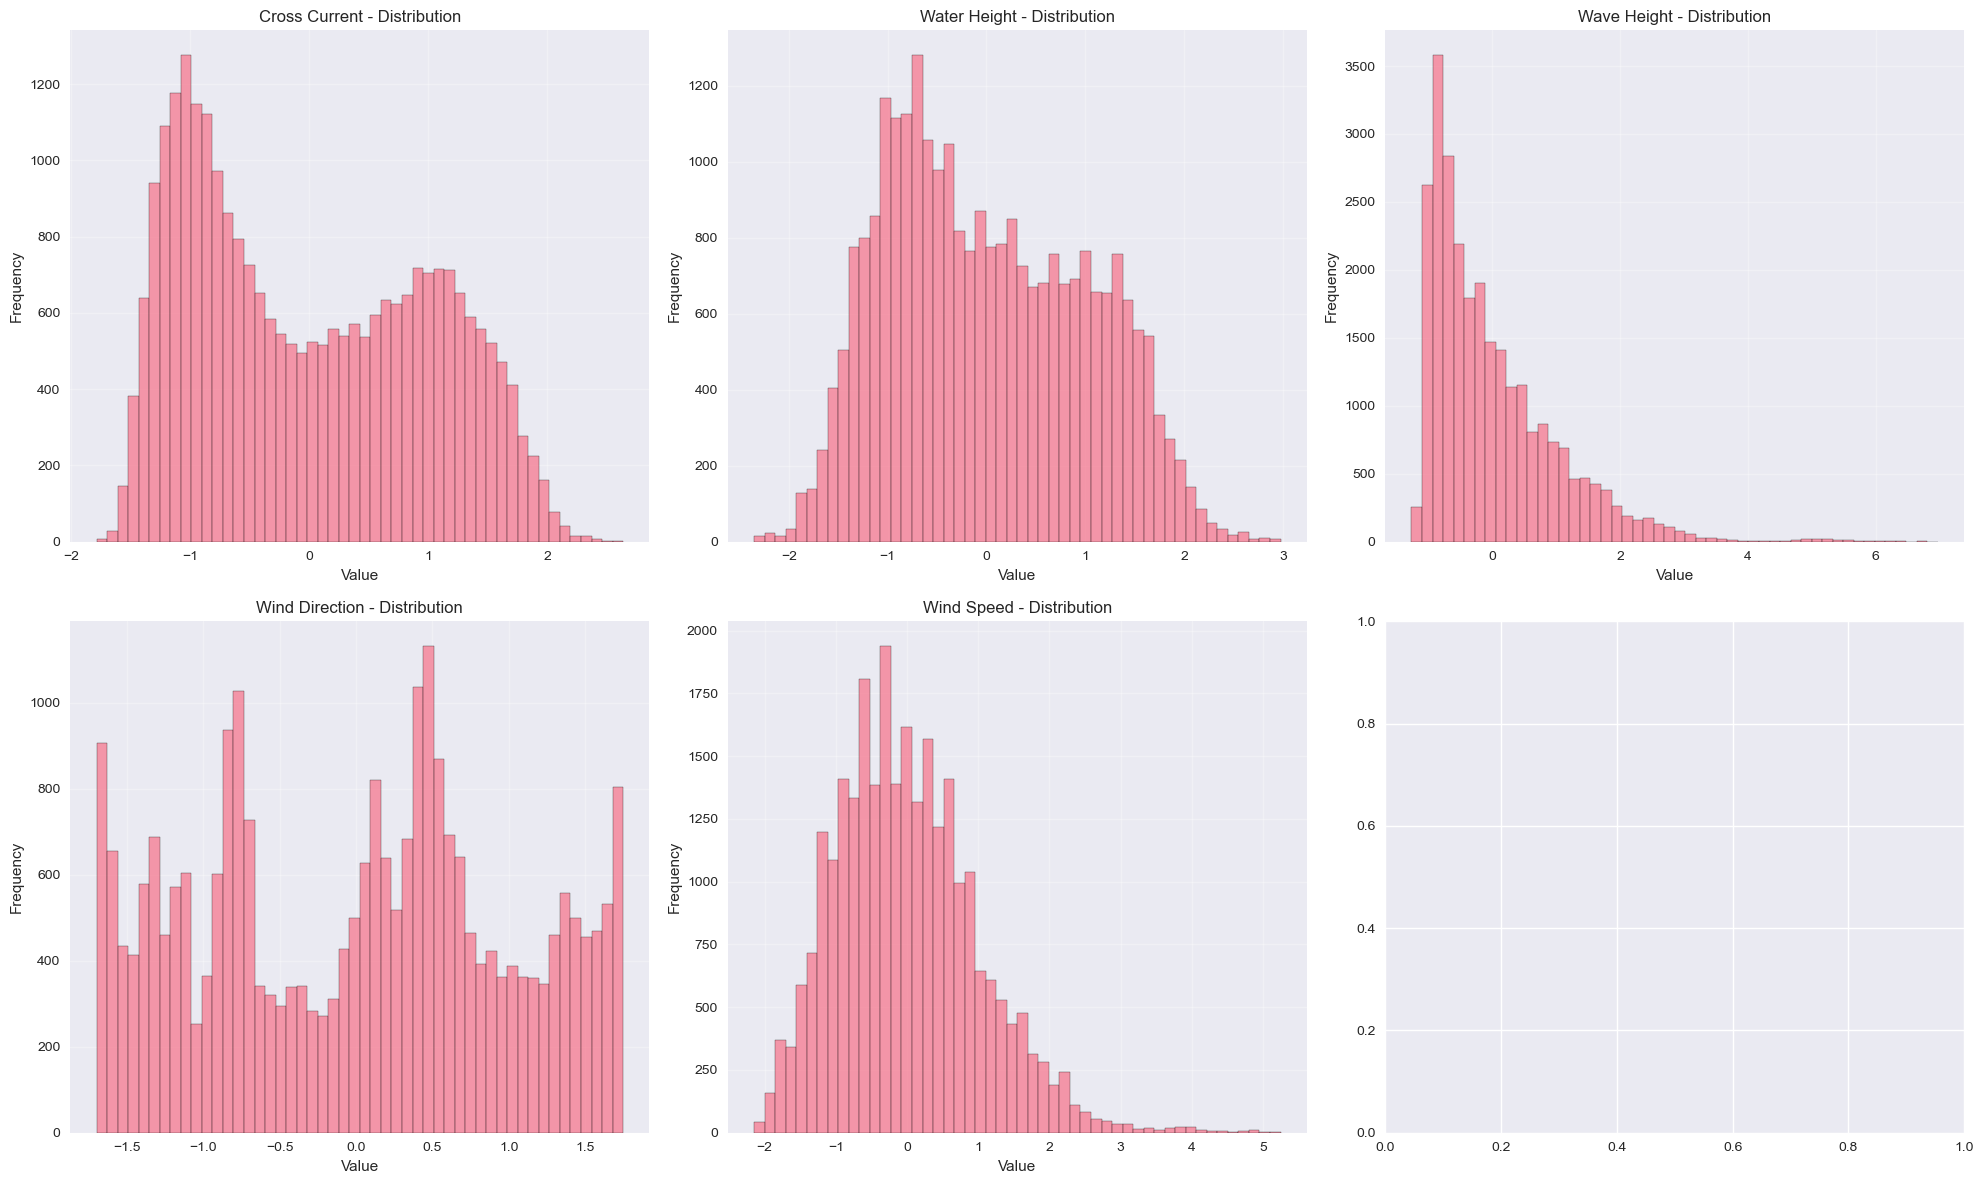

In [56]:
# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, (data_type, df) in enumerate(data_dict.items()):
    if idx >= len(axes):
        break
        
    ax = axes[idx]
    
    # Histogram
    ax.hist(df['value'], bins=50, alpha=0.7, edgecolor='black')
    ax.set_title(f'{data_type.replace("_", " ").title()} - Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()